# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Extraction

In [2]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Data Preprocessing

In [3]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)


In [6]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,False,False,False,False,False,False
3273,False,False,False,False,False,False,False,False,False,False
3274,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.to_csv('water_potability_new.csv', index=False)

# Data Visualization

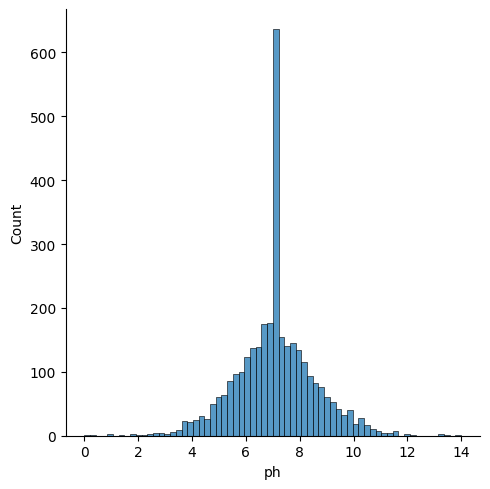

In [9]:
sns.displot(df['ph'])

In [10]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

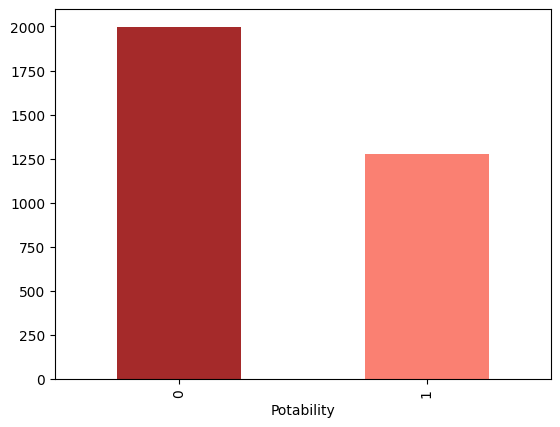

In [11]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

# Linear Regression

In [12]:
x = df.drop('Sulfate',axis=1)
y= df['Sulfate']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=101,shuffle=True)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Mean Squared Error: 1271.8414983546147
R-squared: 0.03710377273954513


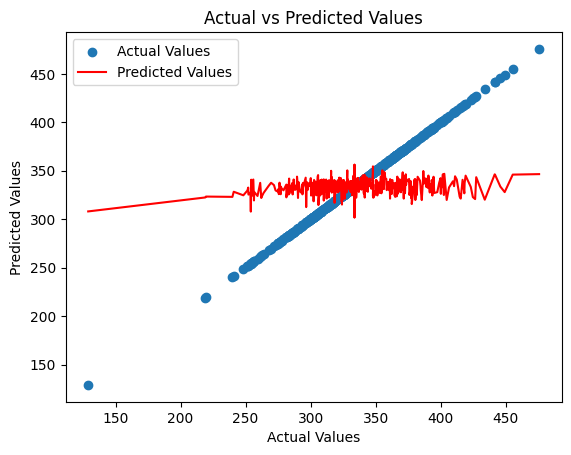

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = model.predict(x_test)
y_test_reset = y_test.reset_index(drop=True)
sorted_indices = np.argsort(y_test_reset)
y_test_sorted = y_test_reset[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test_sorted, y_test_sorted, label="Actual Values")
plt.plot(y_test_sorted, y_pred_sorted, color='red', label="Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# T Test

In [16]:
from scipy.stats import ttest_ind
potable = df[df['Potability'] == 1]
non_potable = df[df['Potability'] == 0]

In [17]:
t_stat, p_value = ttest_ind(potable['ph'], non_potable['ph'], equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.19390063704792804
P-value: 0.8462668775031631


# Principal component analysis

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
# Cleaning the dataset by removing unnecessary "Unnamed" columns and setting the last column as the target
cleaned_data = df.copy()

# Dropping columns that have 'Unnamed' in the header except the last one which is the target variable
cleaned_data.columns = cleaned_data.columns.astype(str)
cleaned_data = cleaned_data.loc[:, ~cleaned_data.columns.str.contains('^Unnamed')]

# Extracting features and target
X = cleaned_data.iloc[:, :-1]  # Features (all columns except the last)
y = cleaned_data.iloc[:, -1]   # Target (the last column)

# Checking the cleaned data structure
X.shape, y.shape, X.head(), y.head()

((3276, 9),
 (3276,),
          ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
 0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
 1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
 2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
 3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
 4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   
 
    Organic_carbon  Trihalomethanes  Turbidity  
 0       10.379783        86.990970   2.963135  
 1       15.180013        56.329076   4.500656  
 2       16.868637        66.420093   3.055934  
 3       18.436525       100.341674   4.628771  
 4       11.558279        31.997993   4.075075  ,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: Potability, dtype: int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the explained variance ratio
print("Explained Variance by each component: ", pca.explained_variance_ratio_)
print("Number of components selected: ", pca.n_components_)

Explained Variance by each component:  [0.13368781 0.12606798 0.11652703 0.11344623 0.11144889 0.10778582
 0.10511092 0.09925142 0.08667389]
Number of components selected:  9


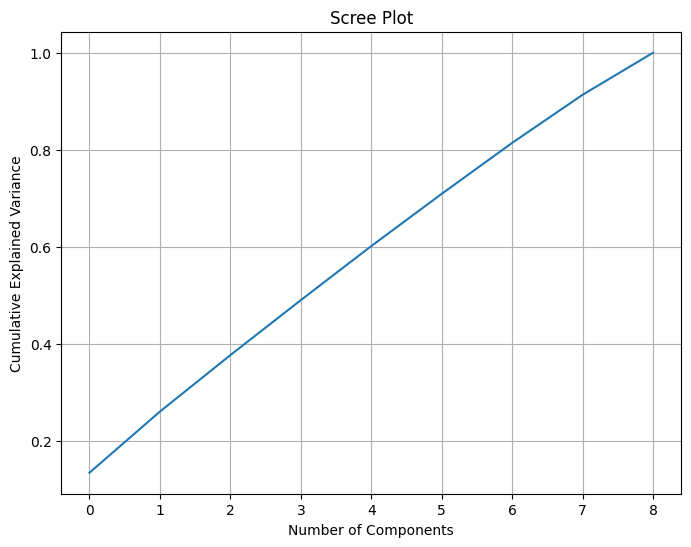

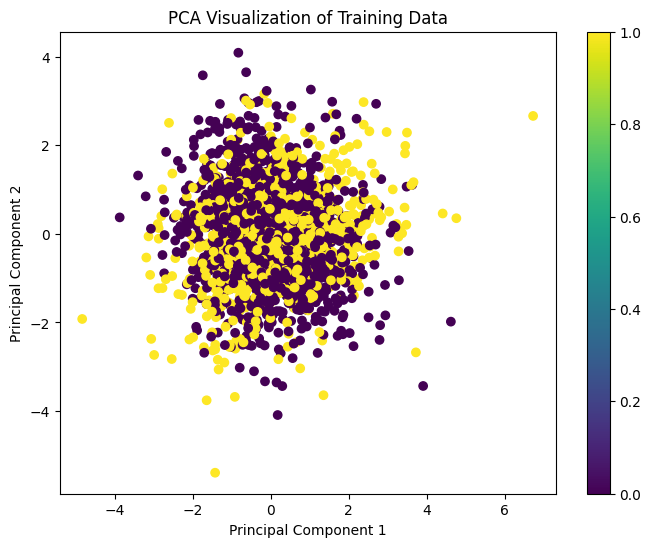

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Scree plot to visualize explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# You can also visualize the first two principal components if you want to see the data in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Training Data')
plt.colorbar()
plt.show()

# Naive Bayes Classification

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
y_train = y_train.astype(int)
y_test = y_test.astype(int)
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train_pca, y_train)

# Predict on test set
y_pred_nb = nb_classifier.predict(X_test_pca)

# Evaluate the model
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Classification Report for Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy:  0.6463414634146342
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.66      0.91      0.76       412
           1       0.57      0.20      0.29       244

    accuracy                           0.65       656
   macro avg       0.61      0.55      0.53       656
weighted avg       0.63      0.65      0.59       656



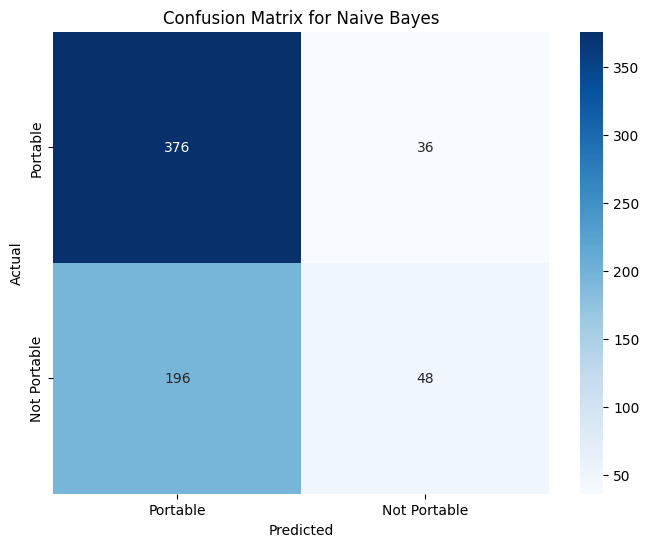

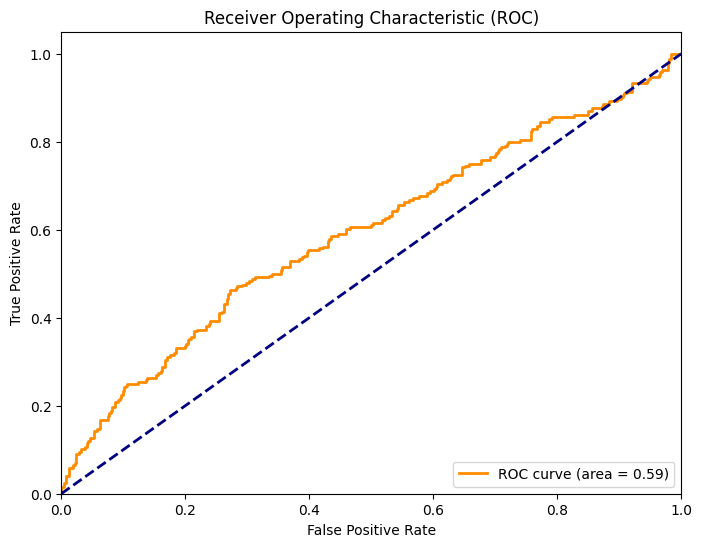

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Portable', 'Not Portable'], yticklabels=['Portable', 'Not Portable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve (if applicable, for binary classification)
from sklearn.metrics import roc_curve, auc

if len(np.unique(y_test)) == 2:  # Only for binary classification
  y_pred_proba = nb_classifier.predict_proba(X_test_pca)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

# Support Vector Machine(SVM)

In [25]:
from sklearn.svm import SVC

# Initialize the SVM classifier (you can tweak 'kernel' based on your needs, e.g., 'linear', 'rbf')
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_pca, y_train)

# Predict on test set
y_pred_svm = svm_classifier.predict(X_test_pca)

# Evaluate the model
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy:  0.6951219512195121
Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656



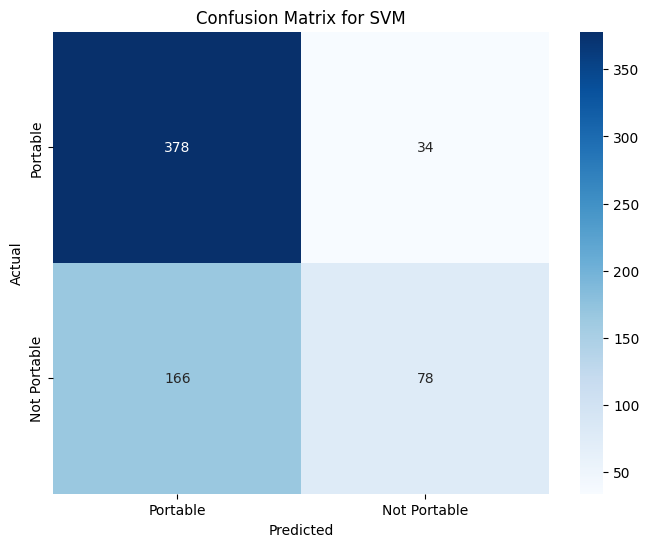

SVM model does not have predict_proba method. Cannot plot ROC curve.


In [26]:
import matplotlib.pyplot as plt
import numpy as np
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['Portable', 'Not Portable'], yticklabels=['Portable', 'Not Portable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# ROC Curve for SVM (if applicable, for binary classification)
if len(np.unique(y_test)) == 2:  # Only for binary classification
  # You may need to use predict_proba for SVM if you want to plot an ROC curve
  # However, SVC by default doesn't have predict_proba, you can use SVC(probability=True)
  # to enable it.
  try:
    y_pred_proba_svm = svm_classifier.predict_proba(X_test_pca)[:, 1]
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) for SVM')
    plt.legend(loc="lower right")
    plt.show()
  except AttributeError:
    print("SVM model does not have predict_proba method. Cannot plot ROC curve.")